<a href="https://colab.research.google.com/github/gzholtkevych/Causality/blob/master/CoDeSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Collective Decision-making Simulation Framework**
The project is devoted to studying mechanisms of collective decision-making based on computer simulation.



## **Decision-making Processes**
In the project context, we consider decision-making as choosing an option from an option set $V$.
Of course, the decisionmaker can refuse a choice.
The last can be considered as choosing a special option not belonging to $V$.
This special option is denoted by $\bot$, and the option set extended by the special option $\bot$ is denoted by $\overline V$ below.  

All of the aforesaid is summing in the next assumption.

***Simulation Assumption 1.***
Some finite set $V$ of options containing at least two elements and the special option $\bot$ called the disclaimer such that $\bot\notin V$ are given and fixed.
The full set of options is $\overline V=\{\bot\}\cap V$.

In [1]:
DISCLAIMER = 0

def define_options(*args):
    """creates option set"""
    if not args:
        raise ValueError('option set is undefined')
    if any(map(lambda x: not isinstance(x, str), args)):
        raise TypeError('invalid option type')
    temp = {DISCLAIMER: "DISCLAIMER"}
    for ic, itm in enumerate(args):
        temp[ic + 1] = itm
    if len(temp) != len(args) + 1:
        raise ValueError('dupliceted options') 
    if len(temp) < 2:
        raise ValueError('number of options is to small')
    return temp

In [2]:
# define option set for simulating

OPTIONS = define_options("red", "blue", "green")

# visualising option set
for ic in OPTIONS:
    print("{}: {}".format(ic, OPTIONS[ic]))

0: DISCLAIMER
1: red
2: blue
3: green


The decisionmaker individual attitude towards an option from $V$ is characterised by the value of individual density of preferences for the option.

***Simulation Assumption 2.***
The individual density of preferences is a function $w:V\to[0,1]$ such that $\sum\limits_{v\in V}w(v)=1$.

The next assumption ensures taking into account the observation that each decisionmaker has some personal feature that influences the frequency of refusing a decision.

***Simulation Assumption 3.***
Each decisionmaker is characterised by an attribute $\alpha>0$, the logarithm of value of which is interpreted as the resoluteness of the decisionmaker.

We are now ready to propose a model of individual decision making.

***Simulation Assumption 4.***
An individual decision-making mechanism is a statistic trial with $\overline{V}$ as the outcome set and the probabilities of the outcomes determined as follows
$$\begin{array}{lcll}
    \Pr(\bot\mid w)&=&h(w)^\alpha\\
    \Pr(v\mid w)&=&(1-h(w)^\alpha)\cdot w(v)&\text{for }v\in V
\end{array}$$
where $\alpha>0$ is the exponential of the decisionmaker resoluteness, and $w$ is one's individual preference density.

Here the efficiency
$$h(w)=\dfrac1{\log|V|}\cdot\sum_{v\in V}w(v)\cdot\log w(v)$$
of $w$, which is understood as a probability density, is used.


In [87]:
# Program model of a decisionmaker

import numpy as np
import numpy.random as rnd


class Decisionmaker:

    def __init__(self,
                 w : "preference density",
                 r : "exponential of resoluteness" = 1.0):
        self._w = w
        self._r = r

    @staticmethod
    def h(w : "preference density") -> "efficiency of w":
        """Argument w : np.array"""
        if any(map(lambda x: x == 1.0, w)):
            return 0.
        log2w = np.log2(w)
        return min(-np.inner(w, log2w) / np.log2(len(w)), 1.0)

    def decide(self) -> "option":
        disclaimer_probability = pow(Decisionmaker.h(self._w), self._r)
        if rnd.choice([True, False],
                      p=[disclaimer_probability,
                         1.0 - disclaimer_probability]):
            return DISCLAIMER
        return rnd.choice(range(1, len(self._w) + 1), p=self._w)

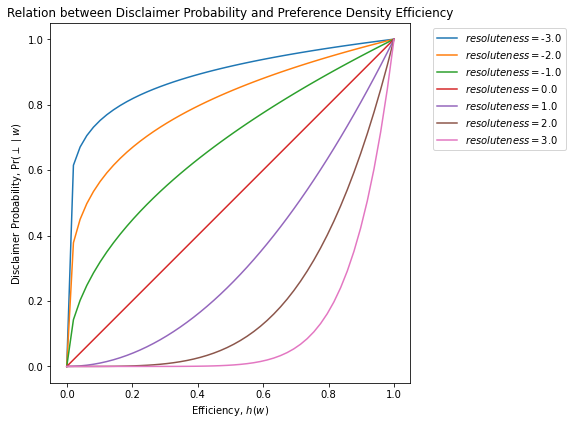

In [5]:
# Illustration for Simulation Assumption 4

import numpy as np
import matplotlib.pyplot as plt
import math

rs = [pow(2, ic) for ic in range(-3,4)]
h = np.linspace(0,1)
p = np.transpose([pow(h, r) for r in rs])
fig = plt.figure(figsize=(5.0,5.0))
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])
ax.set_xlabel("Efficiency, $h(w)$")
ax.set_ylabel("Disclaimer Probability, $\Pr(\perp\mid w)$") 
for i in range(len(rs)):
    ax.plot(h, p[:, i], label=str("$resoluteness=${}".format(math.log2(rs[i]))))
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Relation between Disclaimer Probability and "
          "Preference Density Efficiency")
plt.show()